In [2]:
## Importing Pandas to work with DataFrames
import pandas as pd

# Creating a DataFrame based on the .csv file that contains data about all Corinthians" matches
df = pd.read_csv("/mnt/c/Users/figue/Documents/VS Code Projects/Corinthians performance/corinthians_stats_brasileirao_2024.csv", sep=",", encoding="1252")

# The results will be stored here
result = []

# Evaluating if Corinthians has won, lost of draw every match
for index, row in df.iterrows():
    # Corinthians is the home team
    if row["Home"] == "Corinthians":
        # If the home team made more goals than the away team, it will be considered a win
        if row["Goals_Home"] > row["Goals_Away"]:
            result.append("Win")
        # If the home team made fewer goals than the away team, it will be considered a defeat
        elif row["Goals_Home"] < row["Goals_Away"]:
            result.append("Defeat")
        # If the case is not one of the two above, it will be considered a draw
        else:
            result.append("Draw")
    # Corinthians is the away team
    else:
        # If the home team made more goals than the away team, it will be considered a defeat
        if row["Goals_Home"] > row["Goals_Away"]:
            result.append("Defeat")
        # If the home team made fewer goals than the away team, it will be considered a win
        elif row["Goals_Home"] < row["Goals_Away"]:
            result.append("Win")
        # If the case is not one of the two above, it will be considered a draw
        else:
            result.append("Draw")

# Creating a new column in the DataFrame based on the results we"ve collected before
df["Result"] = result

#Displaying the DataFrame
display(df)

,Date,Home,Goals_Home,Goals_Away,Away,Result
0,2024-04-13,Corinthians,0,0,Atlético Mineiro,Draw
1,2024-04-16,Juventude,2,0,Corinthians,Defeat
2,2024-04-19,Bragantino,1,0,Corinthians,Defeat
3,2024-04-27,Corinthians,3,0,Fluminense FC,Win
4,2024-05-04,Corinthians,0,0,Fortaleza,Draw
5,2024-05-10,Flamengo RJ,2,0,Corinthians,Defeat
6,2024-06-01,Corinthians,0,1,Botafogo FR,Defeat
7,2024-06-10,Atlético GO,2,2,Corinthians,Draw
8,2024-06-15,Corinthians,2,2,São Paulo,Draw
9,2024-06-19,Internacional RS,1,0,Corinthians,Defeat


In [3]:
## Importing NumPy and the defaultdict() function
import numpy as np
from collections import defaultdict

# Dictionary that contains the count of wins, defeats and draws
results_count = np.unique(df["Result"], return_counts=True)
# The results (literally "win", "defeat" and "draw") will be stored here
results = []
# The count of wins, defeats and draws will be stored here
counts = []

# Storing the results and their counts into two lists (the first is the result and the second is the count)
for result in results_count[0]:
    results.append(result)
for count in results_count[1]:
    counts.append(count)

# Creating a dictionary using the defaultdict() function
results_count = defaultdict(int)

# Storing the results and the counts into the dictionary (the key is the result and the value is the count)
for i in range(0, 3, 1):
    results_count[results[i]] = counts[i]

# Making sure the dictionary is REALLY a dictionary to prevent any future error
results_count = dict(results_count)
results_count

{'Defeat': 12, 'Draw': 11, 'Win': 15}

In [4]:
# Creating a DataFrame that has two columns: "Result", that has the result ("Win", "Defeat" and "Draw"); and "Count", which is the count of the results
df_results = pd.DataFrame({"Result": results_count.keys(), "Count": results_count.values()}).sort_values("Count", ascending=False, ignore_index=True)
display(df_results)

,Result,Count
0,Win,15
1,Defeat,12
2,Draw,11


In [5]:
# Creating another DataFrame based on the original DataFrame we"ve created in the first cell, but only with the "Date" and "Result" columns
df_months= df.copy().drop(["Home", "Goals_Home", "Goals_Away", "Away"], axis=1)
# Using Regex to replace the full date with the month number in the "Date" column
df_months["Date"] = df_months["Date"].replace("[0-9]{4}-([0-9]{2})-[0-9]{2}", "\\1", regex=True)
# Renaming the "Date" column to "Month"
df_months.rename({"Date": "Month"}, axis=1, inplace=True)
# Adding columns with boolean values for the results
# e.g.: If Corinthians has won the match, the column "Win" = 1, but if the team has lost the match, the column "Win" = 0 and the column "Defeat" = 1
df_months = pd.concat([df_months, pd.get_dummies(df_months["Result"])], axis=1)
# Removing the "Result" column because we won"t need it anymore
df_months.drop("Result", axis=1, inplace=True)
# Grouping the results by month
df_months = df_months.groupby("Month", as_index=False).aggregate("sum")

# Dictionary to replace the month number with the month name in the "Month" column
month_map = {
    "04": "April",
    "05": "May",
    "06": "June",
    "07": "July",
    "08": "August",
    "09": "September",
    "10": "October",
    "11": "November",
    "12": "December"
}

# Replacing the month number with the month name
df_months["Month"].replace(month_map, inplace=True)

# Displaying the DataFrame
display(df_months)

/tmp/ipykernel_772/48244913.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_months['Month'].replace(month_map, inplace=True)


,Month,Defeat,Draw,Win
0,April,2,1,1
1,May,1,1,0
2,June,3,4,0
3,July,3,1,3
4,August,1,3,1
5,September,2,0,1
6,October,0,1,2
7,November,0,0,5
8,December,0,0,2


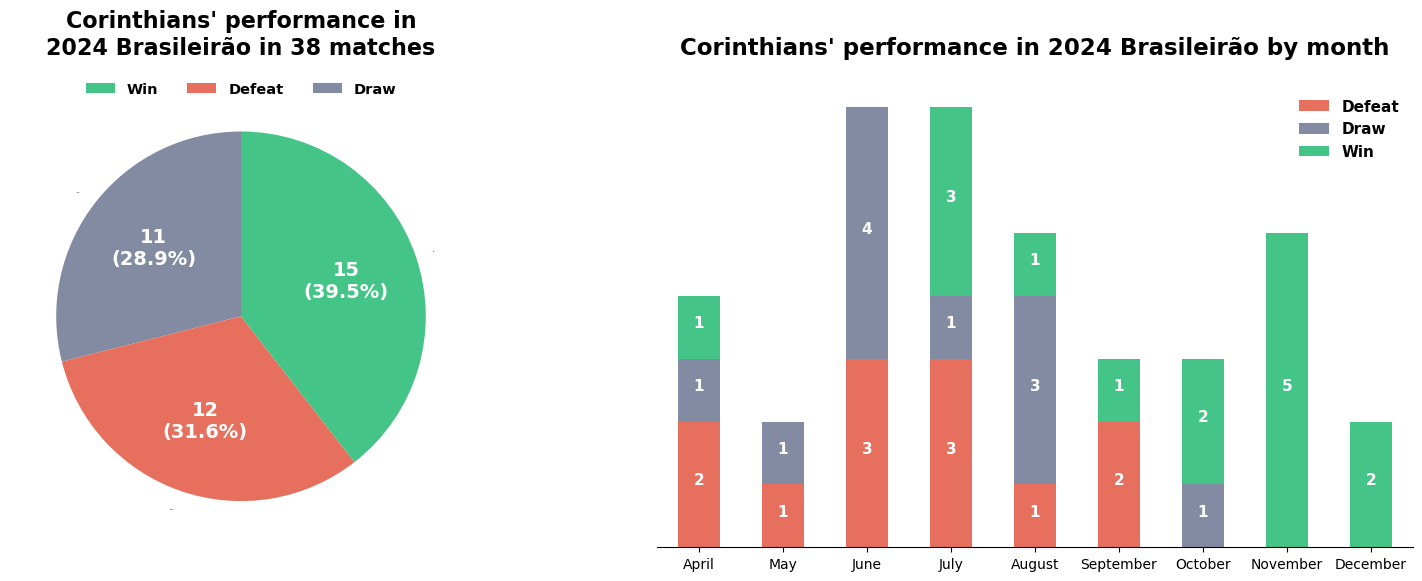

In [6]:
## We"re going to use Matplotlib and Seaborn to make two plots, so we need to import them
import matplotlib.pyplot as plt
import seaborn as sns

## Function that makes a personalized text for autotext using a percentual value and the count of results
def detailed_autopct(pct, count) -> str:
    # Using the percentage value to take the absolute value of count of results
    absolute_value = int(round((pct * np.sum(count)) / 100))
    # Returning a text with the absolute value and its percentual value (e.g.: 10 (30.2%))
    return f"{absolute_value}\n({pct:.1f}%)"

# Creating a figure that contains two plots
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
plt.subplots_adjust(wspace=.05)

## Plotting a pie chart based on the results
wedges, texts, autotexts = ax[0].pie(
    x=df_results["Count"].iloc[::-1],
    labels=df_results["Result"].iloc[::-1],
    colors=["#828ba1", "#e66f5d", "#44c486"],
    # The function is being used here
    autopct=lambda pct: detailed_autopct(pct, df_results["Count"]),
    startangle=90
)

# Pie chart title
ax[0].set_title(
    f"Corinthians's performance in\n2024 Brasileirão in {np.sum(df_results["Count"])} matches",
    fontsize=16, fontweight="bold", y=1.05
)

# Personalizing the autotexts
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color("white")
    autotext.set_fontweight("bold")

# Removing the labels from the slices
for text in texts:
    text.set_fontsize(0)

# Variable that reorders the slices order for a better visualization
reordered_wedges = [wedges[["Draw", "Defeat", "Win"].index(label)] for label in ["Win", "Defeat", "Draw"]]

# Creating a legend for the plot using the reordered_wedges variable
ax[0].legend(
    reordered_wedges,
    ["Win", "Defeat", "Draw"],
    loc="upper center",
    bbox_to_anchor=(.5, 1.035),
    ncols=3,
    prop={"size": 10.5, "family": "sans-serif", "weight": "bold"},
    frameon=False
)

## Plotting a stacked vertical bar chart based on the results by month
df_months.plot(
    kind="bar",
    x="Month",
    stacked=True,
    color=["#e66f5d", "#828ba1", "#44c486"],
    ax=ax[1]
)

# Stacked vertical bar plot title
ax[1].set_title(
    "Corinthians" performance in 2024 Brasileirão by month",
    fontsize=16.5, fontweight="bold", y=1.05
    )
# Removing the y-axis information from the plot
ax[1].yaxis.set_visible(False)
# Aligning the x-axis ticks in the horizontal
ax[1].xaxis.set_tick_params(rotation=0)
# Removing the x-axis label
ax[1].set_xlabel("")

# Creating a legend for the plot
ax[1].legend(
    prop={"size": 11, "family": "sans-serif", "weight": "bold"},
    frameon=False
)

## We"ll get the x and y values from each bar to make texts that show the count of results

# The x and y values will be stored in tuples along with the bar height, and these tuples will be stored in this list
bar_x_and_y = []
# Getting the containers of the plot to get the bars
for container in ax[1].containers:
    # Getting the bar
    for bar in container:
        # Getting the x and y values and the bar height and placing them in a tuple to append the list
        # Note: I have done a few operations to ensure the values will be placed in the center of each bar
        bar_x_and_y.append(
             (
             bar.get_x() + bar.get_width() / 2,
             bar.get_y() + bar.get_height() / 2,
             bar.get_height()
             )
        )

# Making the texts and placing them in the center of each bar
for x, y, height in bar_x_and_y:
    # The text will be written if the y value is higher than 0
    if y > 0:
        ax[1].text(x=x, y=y, s=f"{int(height)}", color="white", fontsize=11, fontweight="bold", ha="center")
    # Of course, if the y value is not higher than 0, it will not be written
    else:
        ax[1].text(x=x, y=y, s="", color="white", fontsize=11, fontweight="bold", ha="center")

# Removing the pines of the top, left and right
sns.despine(left=True)

# Displaying the plot
plt.show()